In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




# # Importing the required libraries (numpy, matplotlib.pyplot, pandas, and seaborn).
# Setting up the interactive shell for displaying all outputs.
# Reading the iris dataset from a CSV file into a Pandas DataFrame and displaying the first few rows of the DataFrame.

In [2]:
df = pd.read_csv('iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.iloc[:, :4].values
Y = df['Species'].values
# Extracting the feature columns (X) and the target variable (Y) from the DataFrame.# 

In [4]:
# Splitting the dataset into training and testing sets using train_test_split from scikit-learn.
# Applying feature scaling using StandardScaler to standardize the feature values.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Printing the sizes of the training and testing datasets.

print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (120, 4), Y: (120,)
Test  Dataset Size - X: (30, 4), Y: (30,)


GaussianNB()

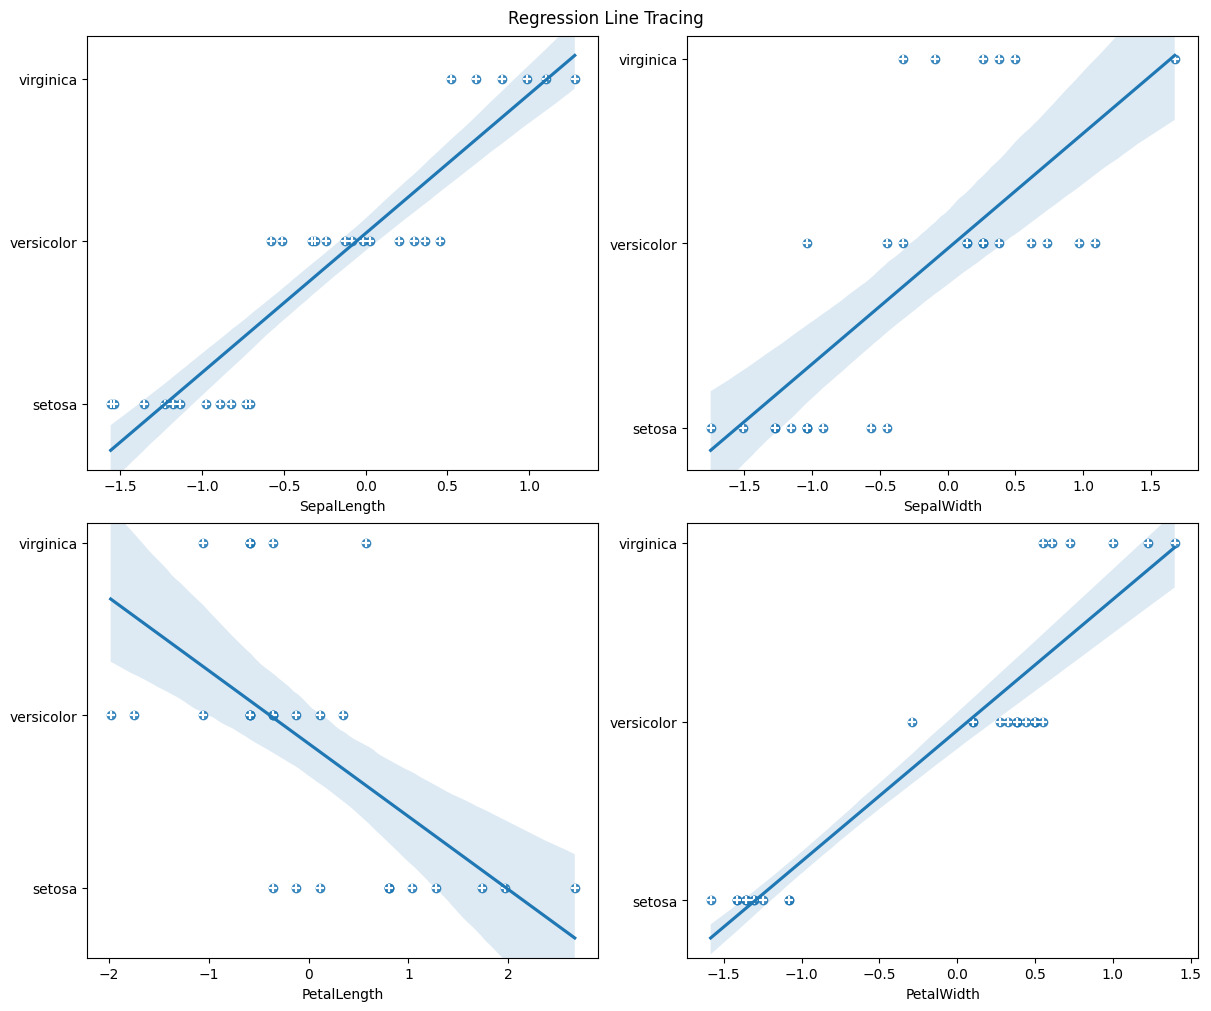

In [5]:
# Importing the Gaussian Naive Bayes classifier from scikit-learn.
# Creating an instance of the classifier and fitting it to the training data.
# Making predictions on the testing data.

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)


# Creating a mapping dictionary for the target variable classes.
# Transforming the predicted class labels into numeric values using the mapping dictionary.
# Creating a 2x2 grid of subplots and setting the figure title.
# Plotting regression lines and scatter plots for each feature against the predicted classes.


mapper = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
predictions_ = [mapper[i] for i in predictions]

fig, axs = plt.subplots(2, 2, figsize = (12, 10), constrained_layout = True);
_ = fig.suptitle('Regression Line Tracing')

for i in range(4):
    x, y = i // 2, i % 2
    _ = sns.regplot(x = X_test[:, i], y = predictions_, ax=axs[x, y])
    _ = axs[x, y].scatter(X_test[:, i][::-1], Y_test[::-1], marker = '+', color="white")
    _ = axs[x, y].set_xlabel(df.columns[i + 1][:-2])

### Confusion matrix 

In [7]:
# Importing the necessary metrics from scikit-learn (confusion_matrix and classification_report).
# Computing the confusion matrix using the true labels and predicted labels.
# Printing the confusion matrix, which shows the counts of true positive (TP), false negative (FN), false positive (FP), and true negative (TN).
# Computing and printing the classification report, which includes precision, recall, F1-score, and support for each class.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_test, predictions)
print(f'''Confusion matrix :\n
               | Positive Prediction\t| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
---------------+------------------------+----------------------
Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n\n''')

cm = classification_report(Y_test, predictions)
print('Classification report : \n', cm)

Confusion matrix :

               | Positive Prediction	| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) 11	| False Negative (FN) 0
---------------+------------------------+----------------------
Negative Class | False Positive (FP) 0	| True Negative (TN) 13


Classification report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# In this code, we performed a classification task using the Gaussian Naive Bayes algorithm on the Iris dataset. Here's a brief summary of what we did:

# We imported the necessary libraries: numpy, matplotlib.pyplot, pandas, and seaborn.
# We set up the interactive shell to display all outputs.
# We loaded the Iris dataset from a CSV file into a Pandas DataFrame.
# We extracted the feature columns (X) and the target variable (Y) from the DataFrame.
# We split the dataset into training and testing sets using the train_test_split function from scikit-learn.
# We applied feature scaling using StandardScaler to standardize the feature values.
# We printed the sizes of the training and testing datasets.
# We imported the Gaussian Naive Bayes classifier from scikit-learn.
# We created an instance of the classifier and fit it to the training data.
# We made predictions on the testing data.
# We created a mapping dictionary to convert the predicted class labels into numeric values.
# We created a 2x2 grid of subplots and plotted regression lines and scatter plots for each feature against the predicted classes.
# We imported the necessary metrics (confusion_matrix and classification_report) from scikit-learn.
# We computed the confusion matrix using the true labels and predicted labels.
# We printed the confusion matrix, which shows the counts of true positive (TP), false negative (FN), false positive (FP), and true negative (TN).
# We computed and printed the classification report, which includes precision, recall, F1-score, and support for each class.
# Overall, the code performs the following steps: data loading, data preprocessing (splitting and scaling), model training and prediction, visualization of results, and evaluation using the confusion matrix and classification report. The purpose is to analyze the performance of the Naive Bayes classifier in classifying the Iris flower species.

In [ ]:
# In the given code, we are evaluating the performance of the classification model by calculating the confusion matrix and generating a classification report. Let's break down each part:

# Confusion Matrix: The confusion matrix is a table that represents the performance of a classification model. It summarizes the predictions made by the model on a test dataset. In the code, we compute the confusion matrix using the true labels (Y_test) and the predicted labels (predictions).

# The confusion matrix is organized as follows:

# mathematica
# Copy code
#                 | Positive Prediction | Negative Prediction
# --------------- | ------------------- | -------------------
# Positive Class  | True Positive (TP)  | False Negative (FN)
# --------------- | ------------------- | -------------------
# Negative Class  | False Positive (FP) | True Negative (TN)
# True Positive (TP): The number of instances that are correctly predicted as positive.
# False Negative (FN): The number of instances that are incorrectly predicted as negative.
# False Positive (FP): The number of instances that are incorrectly predicted as positive.
# True Negative (TN): The number of instances that are correctly predicted as negative.
# The confusion matrix helps in assessing the performance of the model by providing insights into the type and count of errors made during the classification.

# Classification Report: The classification report provides a comprehensive evaluation of the model's performance by calculating several metrics for each class. It includes the following metrics:

# Precision: The ability of the model to correctly identify the positive class (precision = TP / (TP + FP)).
# Recall: The ability of the model to find all positive instances (recall = TP / (TP + FN)).
# F1-score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
# Support: The number of instances in each class in the test dataset.
# The classification report gives a detailed overview of the model's performance, indicating how well it performs for each class in terms of precision, recall, F1-score, and support.

# By printing the confusion matrix and classification report, we can gain insights into the model's performance, identify potential areas of improvement, and compare different models or approaches for classification tasks.